In [142]:
import homographies_2D
from fonctions_image import *
from matplotlib import pyplot as plt
import numpy as np
import cv2
import importlib
importlib.reload(homographies_2D)
from homographies_2D import *

Found 28 valid pieces
Piece areas: [16139, 37070, 16899, 17437, 20994, 15578, 17526, 18250, 19220, 13309, 17858, 42129, 22072, 19177, 16610, 15194, 17257, 14371, 16758, 14289, 21019, 20080, 21742, 16568, 22368, 16752, 17775, 17950]


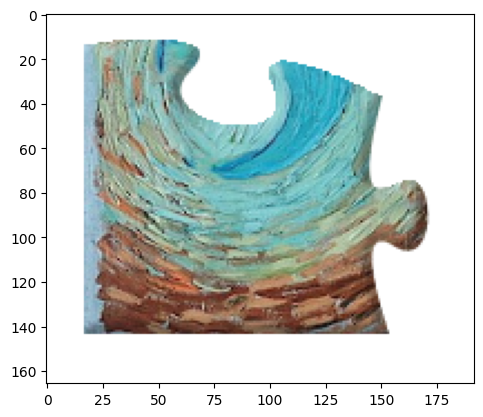

In [143]:
photo_pieces= cv2.imread('../exemples/van-gogh.png')
puzzle= cv2.imread('../exemples/van-gogh_solved.png')
pieces=extract_pieces(photo_pieces)
piece1=pieces[0]["matching_image"]
plt.imshow(piece1)





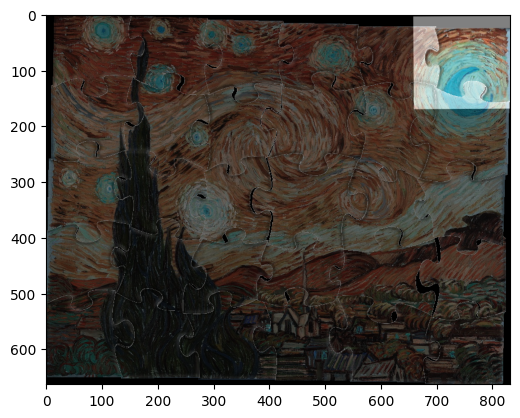

In [144]:
kp_im, des_im=get_keypoints_and_des(piece1)
kp_puzzle, des_puzzle=get_keypoints_and_des(puzzle)
matches=match_keypoints(kp_im,des_im, kp_puzzle,des_puzzle)

src_points = np.array([kp_im[m.queryIdx].pt for m in matches])
dst_points = np.array([kp_puzzle[m.trainIdx].pt for m in matches])


#s, theta, t=estimate_rigid_transform(src_points, dst_points)
s, theta, t=ransac_transform_estimation(kp_im, kp_puzzle, matches, 100000, 10**1)

H=homography_matrix(s, theta, t)

s, theta, t=extract_transform_from_homography(H)

height, width, _ = puzzle.shape  # Taille de l'image cible
warped_piece1 = cv2.warpPerspective(piece1, H, (width, height))

# Superposer les images
result = cv2.addWeighted(puzzle, 0.5, warped_piece1, 0.5, 0)

plt.imshow(result)


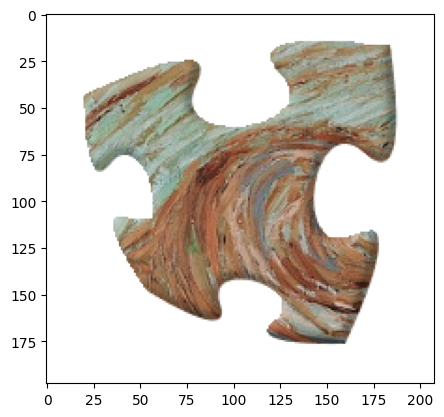

In [145]:
piece2=pieces[2]["matching_image"]
plt.imshow(piece2)


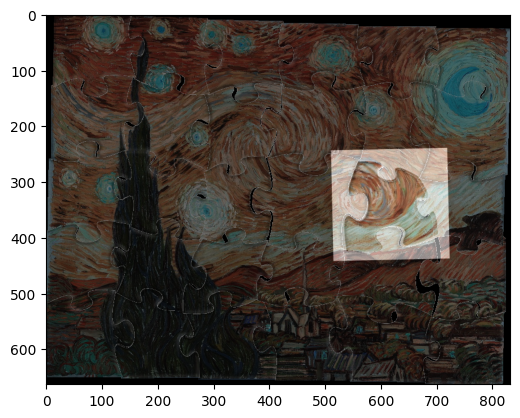

In [146]:
kp2, des2=get_keypoints_and_des(piece2)
matches2=match_keypoints(kp2,des2, kp_puzzle,des_puzzle)
theta2,t2=ransac_transform_estimation_known_scale(kp2, kp_puzzle, matches2,s)
H2=homography_matrix(s, theta2, t2)
show_homography_on_puzzle(piece2, puzzle, H2)